# Test avec normalisation des canaux #

In [1]:
import numpy as np
import pylab as pl
import PIL 

# Conversion d'une image en 2darray

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# Calcul des paramètres de Stockes 
def stockes(imgs, H): 
    s = [] # create an empty list
    for i in range(0,3):
        s.append(sum(H[i,j]*img for j, img in enumerate(imgs)))
    return s

def mat_H():
    P = {}
    P['theta'] = np.array([0, 45, 90]) *pl.pi/180
    P['T'] = np.array([0.5, 0.5, 0.5])
    P['P'] = np.array([1., 1., 1.])

    # Calcul de la matrice H, la matrice de calibration de polarisation en format 2darray

    M01s = P['T']
    M02s = np.cos(2*P['theta']) * P['T'] * P['P']
    M03s = np.sin(2*P['theta']) * P['T'] * P['P']
    Mt = np.array((M01s, M02s, M03s))
    H = pl.dot(pl.inv(pl.dot(Mt,Mt.T)), Mt)
    return H

def calcul_dop(s):
    dop = np.sqrt(s[1]**2+s[2]**2)/s[0] # Deg polarisation
    return dop

def calcul_aop(s):
    aop = 0.5*np.arctan2(s[2], s[1]) # Angle polarisation
    return aop

In [2]:
import matplotlib as mpl
import PIL
import pylab as pl

def normalize(A):
    A = (A - np.amin(A))/(np.amax(A) - np.amin(A))
    return(A)


im1 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/0.jpg'))
im2 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/45.jpg'))
im3 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00089/90.jpg'))

imgs = [im1, im2, im3] # Images en rgb

im_Stockes = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

H = mat_H()

s = stockes(imgs, H)

im_Stockes[:,:,0] = normalize(rgb2gray(s[0]))
im_Stockes[:,:,1] = normalize(rgb2gray(s[1]))
im_Stockes[:,:,2] = normalize(rgb2gray(s[2]))

mpl.image.imsave("im6_Stockes.png", im_Stockes)

im_param_pola = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

anop = calcul_aop(s)
degop = calcul_dop(s)

im_param_pola[:,:,0] = normalize(rgb2gray(s[0]))
im_param_pola[:,:,1] = normalize(rgb2gray(anop))
im_param_pola[:,:,2] = normalize(rgb2gray(degop))

mpl.image.imsave("im6_param_pola.png", im_param_pola)

Using TensorFlow backend.
/home/rblin/anaconda3/envs/polarimetrie/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


processing time:  2.422856092453003


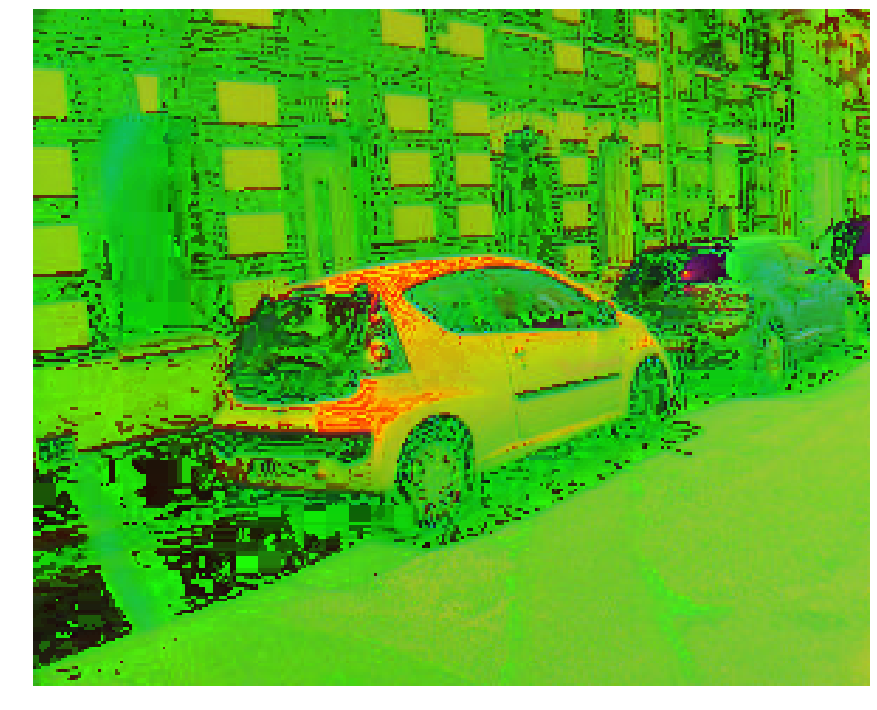

In [3]:
# Détection de l'image construite avec l'intensité, AOP et DOP

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

processing time:  1.655310869216919


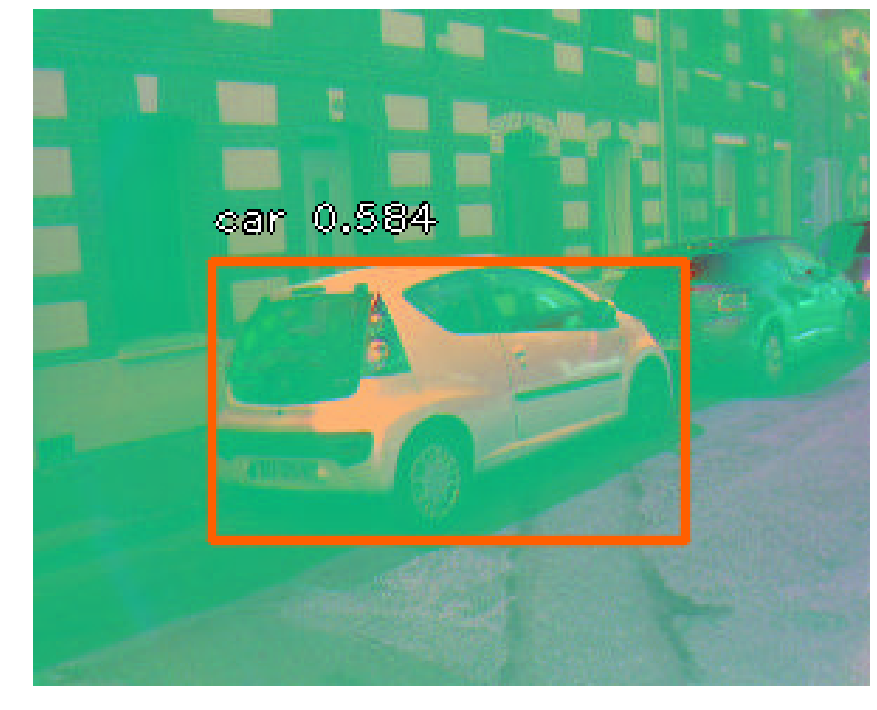

In [4]:
# Detection de l'image avec les paramètres de Stockes

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

In [ ]:
# Image normalisée

import matplotlib as mpl
import PIL

im1 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/0.jpg'))
im2 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/45.jpg'))
im3 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/90.jpg'))

imgs = [im1, im2, im3] # Images en rgb

im_Stockes = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

H = mat_H()

s = stockes(imgs, H)

im_Stockes[:,:,0] = normalize(rgb2gray(s[0]))
im_Stockes[:,:,1] = normalize(rgb2gray(s[1]))
im_Stockes[:,:,2] = normalize(rgb2gray(s[2]))

mpl.image.imsave("im7_Stockes.png", im_Stockes)

im_param_pola = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

anop = calcul_aop(s)
degop = calcul_dop(s)

im_param_pola[:,:,0] = normalize(rgb2gray(s[0]))
im_param_pola[:,:,1] = normalize(rgb2gray(anop))
im_param_pola[:,:,2] = normalize(rgb2gray(degop))

mpl.image.imsave("im7_param_pola.png", im_param_pola)

processing time:  2.3829171657562256


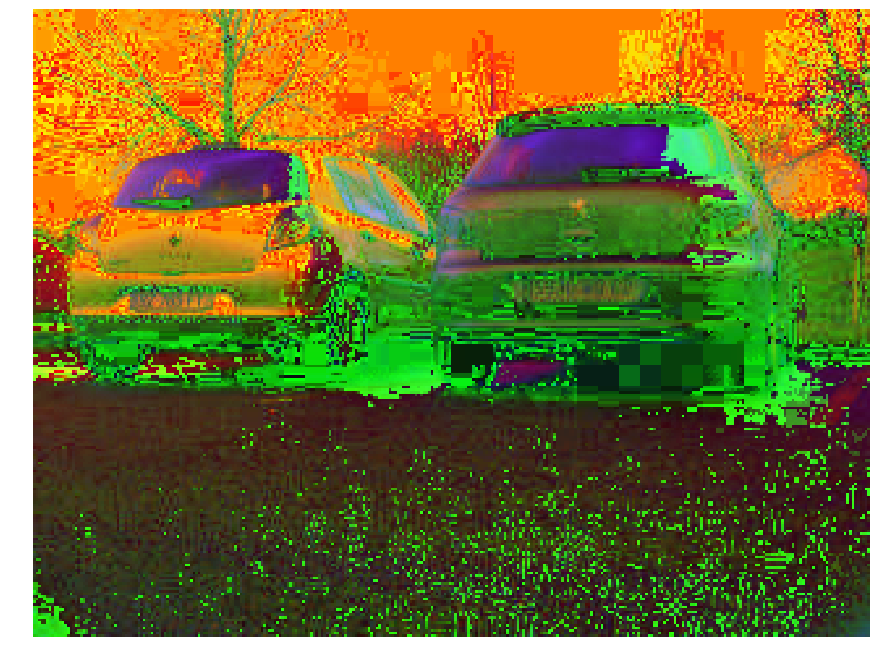

In [5]:
# Détection de l'image construite avec l'intensité, AOP et DOP

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

processing time:  2.1380655765533447


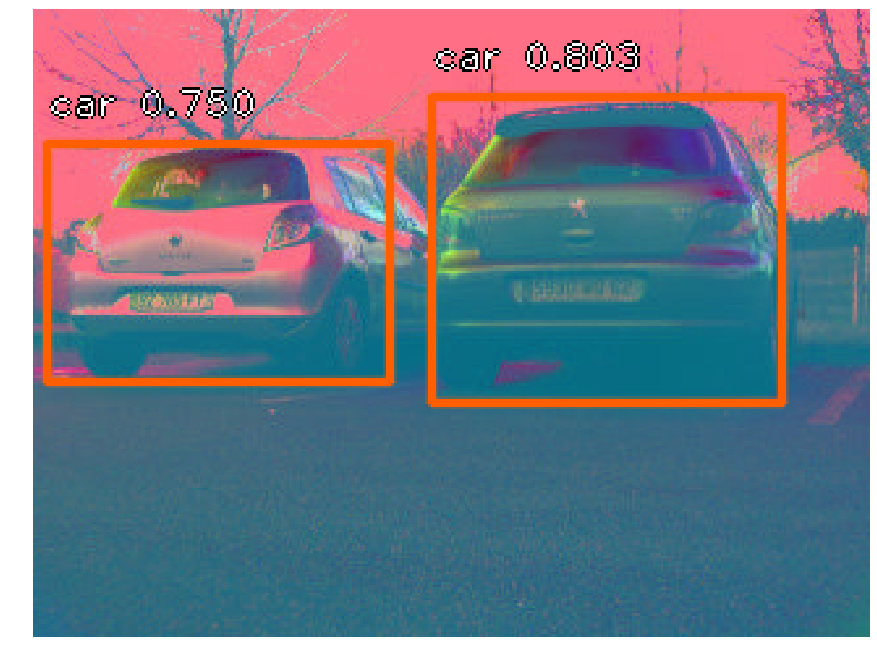

In [6]:
# Detection de l'image avec les paramètres de Stockes

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

In [7]:
# Image normalisée

import matplotlib as mpl
import PIL

im1 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/0.jpg'))
im2 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/45.jpg'))
im3 = np.asarray(PIL.Image.open('/home/rblin/Documents/Archive/images/polar_car_set/polar_car_set/snc00007/90.jpg'))

imgs = [im1, im2, im3] # Images en rgb

im_Stockes = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

H = mat_H()

s = stockes(imgs, H)

im_Stockes[:,:,0] = normalize(rgb2gray(s[0]))
im_Stockes[:,:,1] = normalize(rgb2gray(s[1]))
im_Stockes[:,:,2] = normalize(rgb2gray(s[2]))

mpl.image.imsave("im8_Stockes.png", im_Stockes)

im_param_pola = np.zeros((im1.shape[0], im1.shape[1], im1.shape[2]))

anop = calcul_aop(s)
degop = calcul_dop(s)

im_param_pola[:,:,0] = normalize(rgb2gray(s[0]))
im_param_pola[:,:,1] = normalize(rgb2gray(anop))
im_param_pola[:,:,2] = normalize(rgb2gray(degop))

mpl.image.imsave("im8_param_pola.png", im_param_pola)

processing time:  3.008279800415039


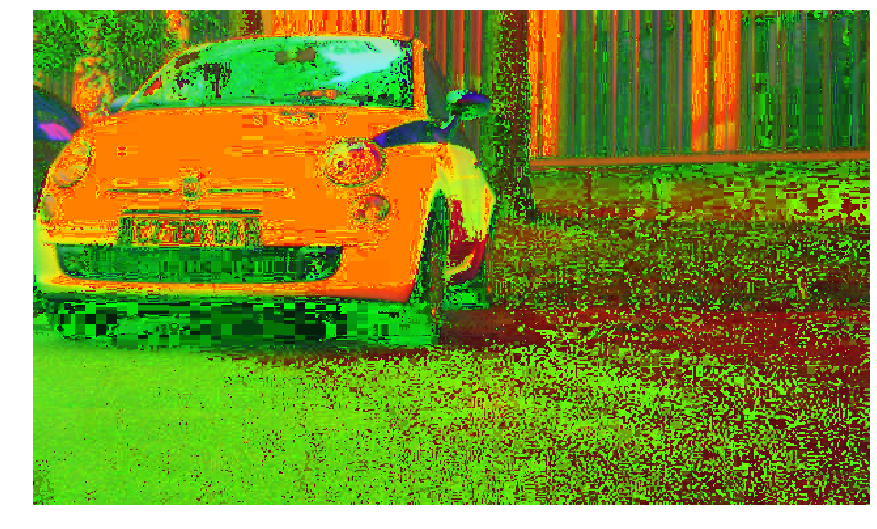

In [8]:
# Détection de l'image construite avec l'intensité, AOP et DOP

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

processing time:  2.6319265365600586


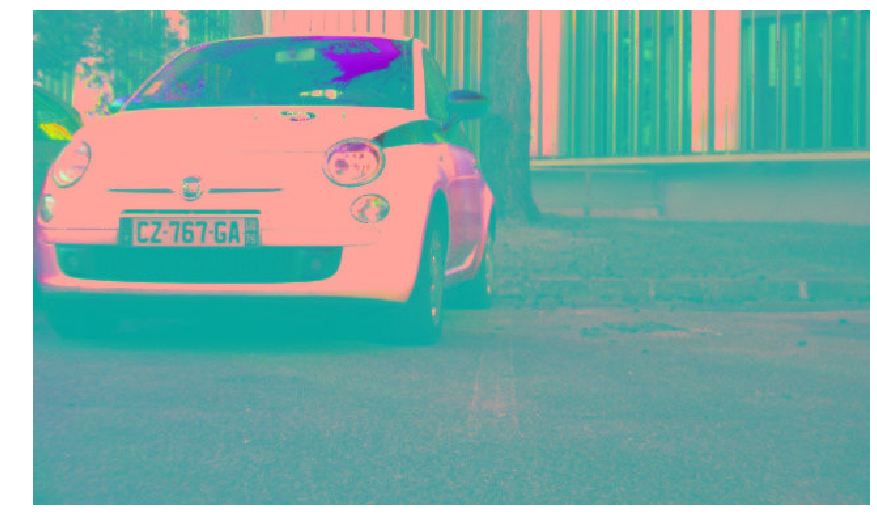

In [9]:
# Detection de l'image avec les paramètres de Stockes

%run /home/rblin/Documents/Archive/keras-retinanet-master/examples/ResNet50RetinaNetTest.py

## Conclusion sur la batterie de tests ##

On remarque que le réseau n'arrive pas à reconnaître les images construites à partir des caractéristiques polarimétriques. Ceci est en partie du à l'erreur présente dans les images polarimétriques puisque celles-ci n'ont pas été prise avec une caméra performante. De plus, on constate que les couleurs dominantes dans les images sont le jaune le rouge et le rose. Le réseau n'ayant pas été appris sur des images ayant ce genre de couleurs en majorité, cela biaise aussi la reconnaissance puisque le réseau s'attend à retrouver d'autres couleurs dans une voiture. 
De plus, les valeurs des couches représentant l'AOP et le DOP sont comprises respectivement entre -pi/2:pi/2 et 0:1. Ce qui n'est donc pas de la même échelle que les valeurs des couches RGB qui sont toutes comprises entre 0:255. Ce qui donne donc à la fin une image déséquilibrée.  
Il faut donc entraîner un réseau de neurones de telle sorte que celui-ci puisse traîter l'AOP et le DOP autrement que comme des couches RGB, ne serait-ce que pour des questions d'échelle.

En revanche, une fois les résultats normalisés, on constate que le réseau fait une détection bien meilleure, même si celle-ci n'est pas optimale. Ce qui veut donc dire qu'entraîner un réseau de neurones pourrait améliorer énormément les résultats de la détection, voire surpasser les résultats de la détection classique si utilisation d'une méthode de fusion avec les images RGB.